## Euler's Method: Obtaining Solutions to ODE's Numerically

#### Author: Jaime Sabal
#### Date: 03/07/2020

In this notebook we explore the extent to which Euler's Method can be used to accurately obtain the solution to an ordinary differential equation. Euler's method follows from the definition of a derivative by the Fundamental Theorem of Calculus:

$$
\frac{dx}{dt} = \lim_{dt\to0} \frac{x(t+dt)-x(t)}{dt}
$$

Moreover, using the approximation that

$$ \frac{dx}{dt} \approx \frac{x(t+dt)-x(t)}{dt} $$

and subsituting in a simple 1st-order ordinary differential equation (ODE):

$$ \frac{dx}{dt} = -Ax $$

we can rearrange to solve for $x(t+dt)$ as a function of $x(t)$:

$$ x(t+h) = x(t) -Axh, $$

We can thus iteratively solve this ODE, where $h=dt$ is the step taken between each iteration, given some initial condition $x(t_0) = x_0$. More specifically, the update performed on the function upon each increase in the independent variable: $t \rightarrow t+h$, will have the form

$$ x[i+1] = x[i] - A*x[i]*h $$

### Importing Necessary Libraries

We start off by importing the necessary libraries: `numpy`, `matplotlib`, which will facilitate the calculations and visualisations done.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import time

### Defining Necessary Constants that will be Used Throughout Notebook:

In [3]:
#Limits in array of independent variable (t):
t_max = 5 #upper t limit 
t_min = 0 #lower t limit

A = 1 #constant in ODE
x0 = 1 #initial condition

### Defining a Python function that calculates the solution to any first-order ODE:

In [9]:
#defining function to perform Euler's Method of solving first-order ODE's numerically
def eulers_method(t_min, t_max, h,x0):
    """ Calculates the solution to any first-order ODE for which the derivative of
    a function only depends on the function itself. It requires some initial condition 
    that x(t0)=x0, where t0 is the entry at index 0 of the array of values t. 
    
    Parameters:
    · f (function): derivative of function that will be calculated.
    · t_min (float/int): smallest value in function domain
    · t_max (float/int): largest value in function domain
    · h (float): step size in iteration
    · x0 (float): initial condition; value of wanted function at time t0 
    (index 0 of array t).
    
    Outputs:
    · t (1D NumPy array): array of values for the independent variable of the ODE
    · x (1D NumPy array): the computed approximation to the solution of the ODE 
    from Euler's Method.
    · time (float): time taken to compute function in seconds
    """
    import time
    import math #importing math library
    
    x = [] #initialise array of values for our solution
    x.append(x0) #append our initial condition x0
    
    #finding upper bound for array of values for independent variable
    #equal to multiple of h that is closest to t_max without surpassing it
    upper_bound = t_max-(t_max%h)
    
    #setting array of values for independent variable   
    t = np.linspace(t_min,upper_bound,math.ceil((t_max-t_min)/h))
    
    start = time.time() #start timer 
    
    #calculate solution iteratively
    for i in range(0,len(t)-1):
        x.append(x[i]+ODE(x[i])*(t[i+1]-t[i]))
    
    end = time.time() #end timer
    
    #return array of steps used in iteration
    # as well as complete array of values for solution 
    time = end-start
    return t,x,time

### Defining a Python function for the Differential Equation

In [10]:
def ODE(x):
    """Returns the value of the differential equation dx/dt=-A*x(t) for a given x and t.
    
    Parameters:
    · x (float): Value of independent variable x that our derivative is dependent on.
    · t (float): Value of dependent variable t that x is dependent on.
    · global variable A (float/int): constant of proportionality between the derivative
    of a function and the function itself.
    
    Output: 
    · dx (float): Value of derivative dx/dt for the specified x and t
    """
    global A
    
    deriv_x = -A*x
    return deriv_x

### Obtaining a Numerical Solution to ODE:

Next, we will use the defined functions `eulers_method` and `ODE` to obtain a numerical solution to the specified ordinary differential equation:

$$ \frac{dx}{dt} = -x $$

where, for simplicity, $A=1$. Moroever, we will use the initial condition that $x(t=0)=1$ and a value for the step size of $h=0.9$*. Furthemore, we will use a range of values $0 \leq t \leq 5$ to appreciate well the difference between the analytic and numerical solutions later on (since they're asymptotic and both tend to 0 for large values of t)

*Note that we must choose a step size small enough that we dont overshoot $x(t)$ to a value outside its known range (this being $x \epsilon  [0,\infty]$). For this reason, the step size we choose must be $0 < h < 1$.

In [11]:
h1 = 0.9 #step size

#calling our function to solve the differential equation
t_num1,x1,time1 = eulers_method(t_min,t_max,h1,x0)

print("The array of values for the solution to the differential equation across all t:\n"
      , x1)

The array of values for the solution to the differential equation across all t:
 [1, 0.09999999999999998, 0.009999999999999995, 0.0009999999999999974, 9.999999999999983e-05, 9.999999999999986e-06]


### Plotting and Comparing with Analytical Solution:

Since the above ordinary differential equation is separable, we can solve it analytically as such:

$$ \frac{dx}{x} = -t $$

$$ln(x) = -t + C$$

$$x(t) = e^{-t+C} = e^{C}e^{-t}$$

In this case we have defined our initial condition to be $x(t=0)=1$, and hence by plugging this into the equation above we get:

$$ x(t=0) = e^{C}e^{0} = 1$$

$$ \therefore e^{C} = 1 $$

Resulting in the final analytic solution to the ODE:

$$x(t) = e^{-t}$$

We can plot this result using the `matplotlib` library and compare it with the acquired numerical solution:

The time taken to calculate each solution:
Numerical with h=0.90: time=0.00002 seconds
Analytic: time=0.00036 seconds


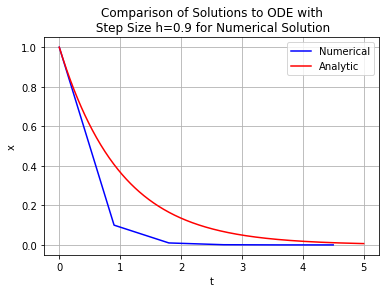

In [12]:
#Analytic solution
start_anal = time.time() #timer start
t_anal = np.linspace(0,5,500)
x_anal = np.exp(-t_anal)
end_anal = time.time() #timer end

#Time taken to calculate analytic solution
time_anal = end_anal-start_anal

#Plotting both solutions in a figure
plt.figure()
plt.title("Comparison of Solutions to ODE with\n Step Size h=%0.1f for Numerical Solution"%(h1))
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t_num1,x1,"b", label="Numerical")
plt.plot(t_anal,x_anal,"r", label="Analytic")
plt.legend(loc="best");

print("The time taken to calculate each solution:")
print("Numerical with h=%0.2f: time=%0.5f"%(h1,(time1)), "seconds") 
print("Analytic: time=%0.5f seconds"%(time_anal))

As can be seen, the result shows a solution that has the same trend as the one found analytically, but that approaches its asymptote at $x=0$ at a much quicker rate due to the large step size.

We can further extend our analysis by calculating the maximum error when comparing our found numerical solution with the analytic one.

### Defining function to calculate maximum error of numerical solution

In [13]:
def max_error(x_num,t_num):
    """Calculates the maximum error between two arrays representing the calculated 
    analytic and numerical solutions to the ordinary differential equation dx/dt=-Ax.
    
    Inputs:
    · x_num (1D NumPy array): array of values for numerical solution.
    · t_num (1D NumPy array): array of values for independent variable of 
    numerical solution.
    
    Output:
    · max_error (float): maximum error of the numerical solution when comparing it
    to the analytic result.
    """
    adj_x_anal = np.exp(-t_num)
    
    errors = abs(np.subtract(adj_x_anal,x_num))
    
    max_error = max(errors)
    
    return max_error

### Maximum error of Numerical Solution with Step Size $h=0.9$:

In [14]:
max_error1 = max_error(x1,t_num1) #calculate value fo max error

print("The maximum error between the two functions is:\n error = %0.4f"%(max_error1))

The maximum error between the two functions is:
 error = 0.3066


#### Step size $h=0.09$:

We can now try to use a smaller step size (by an order of magnitude) of $h=0.09$ to see the effects on the acquired solution:

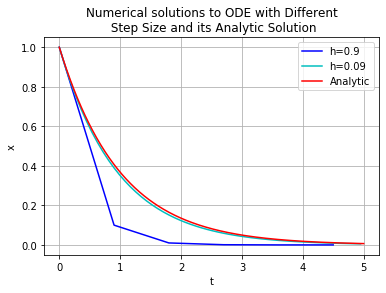

The time taken to calculate each solution:
Numerical with h=0.90: 0.00002 seconds
Numerical with h=0.09: 0.00010 seconds
Analytic: 0.00036 seconds

The maximum error for h=0.9 is:
 error = 0.3066
The maximum error for h=0.09 is:
 error = 0.0172


In [15]:
h2 = 0.09 #new, smaller, step size

#calling our function to solve the differential equation
t_num2,x2,time2 = eulers_method(t_min,t_max,h2,x0)
max_error2 = max_error(x2,t_num2)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solutions to ODE with Different\n Step Size and its Analytic Solution"%())
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t_num1,x1,"b", label="h=0.9")
plt.plot(t_num2,x2,"c", label="h=0.09")
plt.plot(t_anal,x_anal,"r", label="Analytic")
plt.legend(loc="best")
plt.show();

print("The time taken to calculate each solution:")
print("Numerical with h=%0.2f: %0.5f"%(h1,(time1)), "seconds") 
print("Numerical with h=%0.2f: %0.5f"%(h2,(time2)), "seconds") 
print("Analytic: %0.5f seconds"%(time_anal))

print("\nThe maximum error for h=%0.1f is:\n error = %0.4f"%(h1,max_error1))
print("The maximum error for h=%0.2f is:\n error = %0.4f"%(h2,max_error2))

### Discussion:

As can be seen, just reducing the step size by an order of magnitude allows us to acquire a much more accurate solution. However, it is worth mentioning that since the algorithmic complexity of `eulers_method` is $O(n)$, by reducing the step size the program will run slower since it has to perform "$n$" iterations, where $n=len(t)$ is the discrete number of data points, which increases with smaller step size if the range of values of t is kept the same.

It is important to consider the consequences of using a smaller step size, specially when using Euler´s method to approximate the solution of an ODE over a wide range of values, where the number of iterations needed to acquire the solution could result in a very long running time. 

Moreover, and as can be seen from the calculations above, the computation time for the numerical solutions using step sizes $h=0.9$ and $h=0.09$ is lower than that of the analytic solution (0.00002s (h=0.9) and 0.00010s (h=0.09) as compared to 0.00040s for the analytic solution**. This is probably due to the fact that the analytic solution has to call the imported library `numpy`). We will discuss this further after performing more trials with smaller step sizes. 

****Computation times may vary for different trials and/or computer processing powers**.

### Solutions using smaller step sizes:

#### $h=0.001,0.0001,0.00001$:

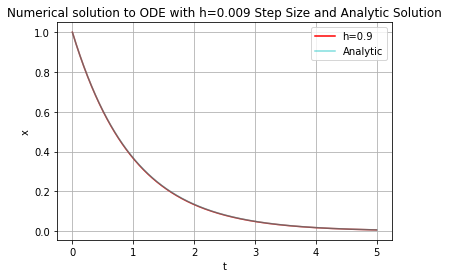

The maximum error for step size h=0.009 is:
 error = 1.661696e-03

The time taken to calculate it was:
 time = 0.00068 seconds


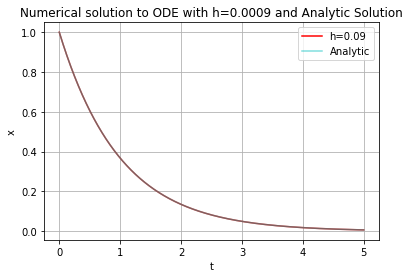

The maximum error for step size h=0.0009 is:
 error = 1.656079e-04

The time taken to calculate it was:
 time = 0.006383 seconds


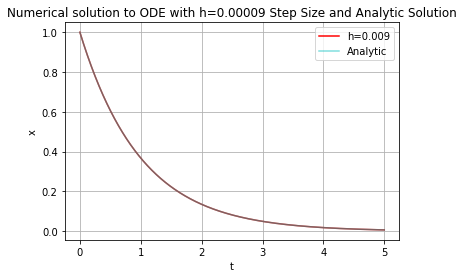

The maximum error for step size h=0.00009 is:
 error = 1.655520e-05

The time taken to calculate it was:
 time = 0.05960 seconds


In [28]:
#three different step sizes
h3 = 0.009 
h4 = 0.0009
h5 = 0.00009

#calling our function to solve the differential equation with their corresponding timers
t3,x3,time3 = eulers_method(t_min,t_max,h3,x0)
max_error3 = max_error(x3,t3)
t4,x4,time4 = eulers_method(t_min,t_max,h4,x0)
max_error4 = max_error(x4,t4)
t5,x5,time5 = eulers_method(t_min,t_max,h5,x0)
max_error5 = max_error(x5,t5)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solution to ODE with h=%0.3f Step Size and Analytic Solution"%h3)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t3,x3,"r", label="h=%0.1f"%h1)
plt.plot(t_anal,x_anal,"c", label="Analytic", alpha=0.5)
plt.legend(loc="best");
plt.show()

print("The maximum error for step size h={0:.3f} is:\n error = {1:e}".format(h3,max_error3))
print("\nThe time taken to calculate it was:\n time = %0.5f seconds"%time3)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solution to ODE with h=%0.4f and Analytic Solution"%h4)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t4,x4,"r", label="h=%0.2f"%h2)
plt.plot(t_anal,x_anal,"c", label="Analytic", alpha=0.5)
plt.legend(loc="best")
plt.show();

print("The maximum error for step size h={0:.4f} is:\n error = {1:e}".format(h4,max_error4))
print("\nThe time taken to calculate it was:\n time = %0.6f seconds"%time4)

#Plotting both solutions in a figure
plt.figure()
plt.title("Numerical solution to ODE with h=%0.5f Step Size and Analytic Solution"%h5)
plt.xlabel("t")
plt.ylabel("x")
plt.grid()
plt.plot(t5,x5,"r-", label="h=%0.3f"%h3)
plt.plot(t_anal,x_anal,"c", label="Analytic", alpha=0.5)
plt.legend(loc="best")
plt.show();

print("The maximum error for step size h={0:.5f} is:\n error = {1:e}".format(h5,max_error5))
print("\nThe time taken to calculate it was:\n time = %0.5f seconds"%time5)


### Discussion:

As can be seen from the values displayed above, the maximum error between the calculated numerical and analytic solutions reduces by approximately the same factor fo 10 as the ste size $h$. 

### Comparison of Time Taken to Calculate Numerical Solutions for 5 Different Steps:

We will now go on and compare the time taken to calculate each of the numerical solutions with different steps $h$. In the cell below we display each of their values.

In [17]:
print("The time taken to calculate each solution:")
print("Numerical with h=%0.1f: %0.5f"%(h1,(time1)), "seconds") 
print("Numerical with h=%0.2f: %0.5f"%(h2,(time2)), "seconds") 
print("Numerical with h=%0.3f: %0.5f"%(h3,(time3)), "seconds") 
print("Numerical with h=%0.4f: %0.5f"%(h4,(time4)), "seconds") 
print("Numerical with h=%0.5f: %0.5f"%(h5,(time5)), "seconds") 
print("Analytic: time=%0.5f seconds"%(time_anal))



The time taken to calculate each solution:
Numerical with h=0.9: 0.00002 seconds
Numerical with h=0.09: 0.00010 seconds
Numerical with h=0.009: 0.00069 seconds
Numerical with h=0.0009: 0.00663 seconds
Numerical with h=0.00009: 0.05855 seconds
Analytic: time=0.00036 seconds


As can be seen, the time values increase significantly as we reduce the step taken between iterations. It is also interesting to compare the factors by which the time values change as the step is reduced. Doing this for the first two steps ($h_1$ and $h_2$)**:

$$ \frac{h_2}{h_1} = 0.1 $$

$$\frac{time_2}{time_1} = \frac{0.00026}{0.00018} = 1.44 $$

Hence, as the step is reduced by a factor of 10, the time required to compute the solution increases by a factor of approximately 1.4. Repeating this for the rest of solutions (where the ratio between step sizes remains constant at 0.1) yields the results:

$$\frac{time_3}{time_2} = \frac{0.00063}{0.00026} = 2.42  $$


$$\frac{time_4}{time_3} = \frac{0.00497}{0.00063} = 7.89 $$


$$\frac{time_5}{time_4} = \frac{0.06056}{0.00726} = 11.05  $$

From these results, it can be seen how the computation time increases at an increasing rate as the step size decreases by a constant factor of 10.

****Note that the values for the times may vary due to differences in the processing power of each computer. However, the above calculations should serve as an approximation of the factor by which these times increase as the step size is reduced.**

## Plotting Computation Time against Step Size

We will now attempt to plot the computation time against the step size in order to durther visualize their relationship. However, there is a limit to the extent in which we can do this. As was discovered before, the amount of time taken to compute the numerical solution of this ODE increases at an increasing rate as the step size is reduced by a factor of 10. For this reason, we will only be able to plot a limitted number of data points in a reasonable amount of computation time. 

In [1]:
#initialize arrays for step size and time
h = []
time = []

i = 0 #initialise iterative variable

#add data to the above arrays using while loop 
#takes approx. 1min to compute with 8 data points
while i<8:
    h.append(h1)
    time.append(eulers_method(t_min,t_max,h1,x0)[2])
    h1 /= 10
    i += 1

#make plot
plt.figure()
plt.plot(h,time,"r-")
plt.title("Computation Time Against Step Size when \nusing Euler's Method to Solve ODE's")
plt.xlabel("Step size / h")
plt.ylabel("Computation Time (seconds)")
plt.grid()

#apply logarithmic scale to h and time axes to visualize better
plt.xscale("log") 
plt.yscale("log") 
plt.savefig("Figure_4.png"); #save figure

NameError: name 'h1' is not defined

## Conclusion



*In any case, a step size that is $\approx$ 3 orders of magnitude lower than the scale of the axis/function in question should suffice for an accurate approximation.